In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [34]:
# load dataset
spotify = pd.read_csv('genres_v2.csv')

# initial data processing
# drop columns that are not required for clustering
columns_to_drop = ['analysis_url', 'track_href', 'uri', 'id', 'title', 'type', 'Unnamed: 0', 'time_signature', 'duration_ms', 'mode', 'genre']
spotify = spotify.drop(columns=columns_to_drop)
# drop duplicate columns
spotify = spotify.drop_duplicates(subset='song_name', keep='first')


spotify.head()


/var/folders/h4/hynycmgd3x59kzk4xdgvp4w00000gn/T/ipykernel_70478/2112711003.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify = pd.read_csv('genres_v2.csv')


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_name
0,0.831,0.814,2,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,Mercury: Retrograde
1,0.719,0.493,8,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,Pathology
2,0.850,0.893,5,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,Symbiote
3,0.476,0.781,0,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,Venom


In [35]:
# standardize features
standard_scaler = StandardScaler()
spotify_scaled = standard_scaler.fit_transform(spotify.drop(columns=['song_name']))

# dispaly first few rows
pd.DataFrame(spotify_scaled, columns=spotify.columns.drop('song_name')).head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.017786,0.876959,-0.855748,-0.070192,1.708509,-0.517461,-0.313183,-0.919586,-0.117024,0.161017
1,0.323055,-0.921799,0.770804,-0.025504,-0.691425,1.091917,-0.369801,-0.508662,-1.245177,-1.286467
2,1.135643,1.319644,-0.042472,0.790557,-0.811915,-0.734434,-0.369784,1.164012,-1.606612,2.270328
3,-1.184264,0.692040,-1.397933,0.814903,-0.525135,-0.687738,-0.369801,-0.535003,-1.028061,1.196001
4,0.813089,-0.187727,-0.855748,-0.171574,0.813642,0.224023,-0.369801,-0.192566,0.742927,-0.149757


In [58]:
# performing PCA
pca = PCA(n_components=3)  # Retain 95% of the variance
principal_components = pca.fit_transform(spotify_scaled)

# creating df with principal components
spotify_pca = pd.DataFrame(data=principal_components)
spotify_pca.head()


,0,1,2
0,-0.723353,-1.171781,-0.685951
1,1.588199,0.106152,-0.689625
2,-1.407409,0.804484,0.757904
3,-0.686376,1.390969,0.106031
4,-0.114688,-1.399030,-0.424348


For n_clusters = 5000 The average 3 scores are : 0.3003672597689811   0.6729859208114914   1312.7641770427854
For n_clusters = 5250 The average 3 scores are : 0.30046938182294564   0.6568322602189434   1331.695358812219
For n_clusters = 5500 The average 3 scores are : 0.3004656996033112   0.6401838801113987   1352.408980039666
For n_clusters = 5750 The average 3 scores are : 0.30019103139311387   0.6238438272326983   1374.311083198753
For n_clusters = 6000 The average 3 scores are : 0.2999623820603192   0.6074422912516567   1397.036953444616


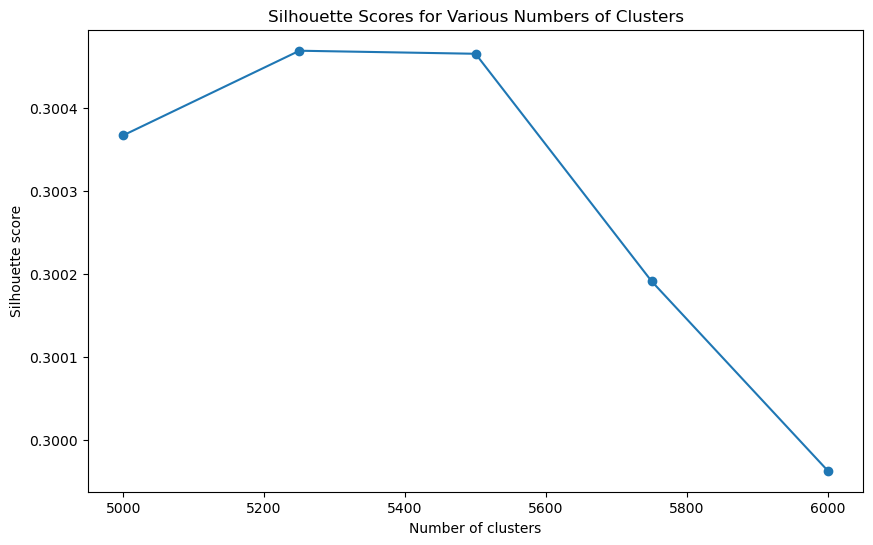

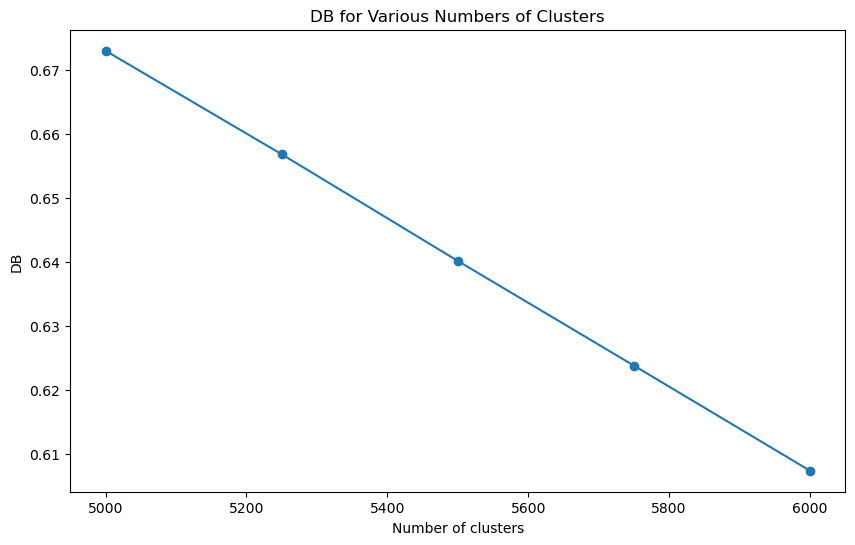

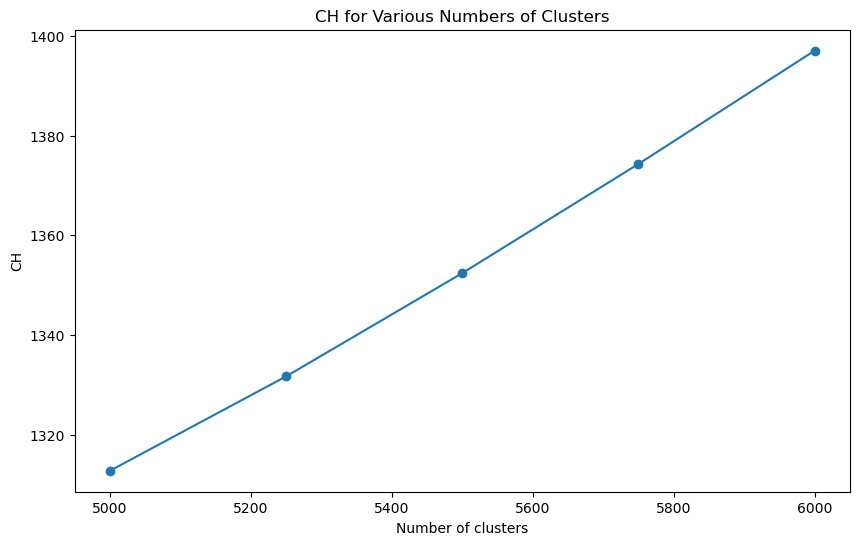

In [79]:
# Range of potential clusters
cluster_range = [5000, 5250, 5500, 5750, 6000]  # testing from 5000-6000 clusters
silhouette_scores = []
db_scores = []
ch_scores = []

for n_clusters in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(spotify_pca)
    silhouette_avg = silhouette_score(spotify_pca, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(spotify_pca, cluster_labels)
    # Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(spotify_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    db_scores.append(davies_bouldin)
    ch_scores.append(calinski_harabasz)
    print("For n_clusters =", n_clusters, "The average 3 scores are :", silhouette_avg, " ", davies_bouldin, " ", calinski_harabasz)

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o')
plt.title('DB for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('DB')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, ch_scores, marker='o')
plt.title('CH for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('CH')
plt.show()



In [74]:
# pac
agg_cluster_model = AgglomerativeClustering(n_clusters=5250)
agg_clusters = agg_cluster_model.fit_predict(spotify_pca)

# add cluster info to original df
spotify['cluster'] = agg_clusters


In [75]:
nearest_neighbors_model = NearestNeighbors(n_neighbors=1)
nearest_neighbors_model.fit(spotify_pca, agg_clusters)

NearestNeighbors(n_neighbors=1)

In [77]:
def preprocess_song(song_features, standard_scaler, pca):
    # preprocess features
    standardized_features = standard_scaler.transform([song_features])
    pca_features = pca.transform(standardized_features)
    return pca_features

def find_cluster(song_features, nearest_neighbors_model, spotify_df):
    # find nearest clusters given features (knn)
    distances, indices = nearest_neighbors_model.kneighbors(song_features)
    nearest_point_index = indices[0][0]
    nearest_cluster = spotify_df.iloc[nearest_point_index]['cluster']
    return nearest_cluster


def recommend_similar_songs(input_song_name, spotify_df, standard_scaler, pca, cluster_model):
    if input_song_name not in spotify_df['song_name'].values:
        return "Song '{}' is not in the dataset.".format(input_song_name)

    try:
        input_song_features = spotify_df[spotify_df['song_name'] == input_song_name].drop(columns=['song_name', 'cluster']).iloc[0]
        preprocessed_input_song = preprocess_song(input_song_features, standard_scaler, pca)
        input_song_cluster = find_cluster(preprocessed_input_song, nearest_neighbors_model, spotify)
        same_cluster_songs = spotify_df[spotify_df['cluster'] == input_song_cluster].copy()
        same_cluster_songs['similarity'] = same_cluster_songs.apply(
            lambda row: np.linalg.norm(preprocess_song(row.drop(['song_name', 'cluster']), standard_scaler, pca) - preprocessed_input_song),
            axis=1
        )
        top_recommendations = same_cluster_songs.sort_values(by='similarity')['song_name'].iloc[1:6].tolist()
        return top_recommendations
    except Exception as e:
        return "An error occurred: {}".format(e)


In [83]:
# testing
input_song_name = "XO Tour Llif3"
recommended_songs = recommend_similar_songs(input_song_name, spotify, standard_scaler, pca, agg_cluster_model)

# display recommendations
print("Songs similar to '{}':".format(input_song_name))
print(recommended_songs)


Songs similar to 'XO Tour Llif3':
['XO TOUR Llif3', 'Ghetto Star', "She Ain't You", 'Lootkemia']


/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhishrajan/anacon

In [80]:
print(db_scores)
print(silhouette_scores)
print(ch_scores)

[0.6729859208114914, 0.6568322602189434, 0.6401838801113987, 0.6238438272326983, 0.6074422912516567]
[0.3003672597689811, 0.30046938182294564, 0.3004656996033112, 0.30019103139311387, 0.2999623820603192]
[1312.7641770427854, 1331.695358812219, 1352.408980039666, 1374.311083198753, 1397.036953444616]
